# 📈 Backend Progress Tracker for The Healthfullness App


This notebook lets you track your backend feature progress.

- Modify the table below by updating `extra_days_taken`.
- Add new features if needed.
- Run the visualization cell to generate an updated `progress.png` chart.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define dataset with new is_completed field
data = {
    "Feature": [
        "User Authentication & Profile",
        "Personalized Nutrition Plan",
        "Food Logging (Manual Entry)",
        "Comprehensive Food Database CRUD",
        "Security & Data Privacy",
        "AI Assistant",
        "Nutrient Analysis & Reporting",
        "Activity & Exercise Logging",
        "Progress Tracking & Insights",
        "Food Logging (QR/Barcode Scan)",
        "Food Logging (Photo/AI Recognition)",
        "Integration with Health/Fitness APIs"
    ],
    "Phase": [
        1, 1, 1, 1, 1, 
        2, 
        3, 3, 3, 
        4, 4, 4
    ],
    "Planned Days": [
        4, 4, 3, 5, 3, 
        8, 
        4, 4, 3, 
        4, 8, 6
    ],
    "Extra Days Taken": [
        0, 0, 0, 0, 0, 
        0, 
        0, 0, 0, 
        0, 0, 0
    ],
    "is_completed": [
        False, False, False, False, False, 
        False, 
        False, False, False, 
        False, False, False
    ]
}

df = pd.DataFrame(data)
df

,Feature,Phase,Planned Days,Extra Days Taken,is_completed
0,User Authentication & Profile,1,4,0,False
1,Personalized Nutrition Plan,1,4,0,False
2,Food Logging (Manual Entry),1,3,0,False
3,Comprehensive Food Database CRUD,1,5,0,False
4,Security & Data Privacy,1,3,0,False
5,AI Assistant (NLP/Voice),2,8,0,False
6,Nutrient Analysis & Reporting,3,4,0,False
7,Activity & Exercise Logging,3,4,0,False
8,Progress Tracking & Insights,3,3,0,False
9,Food Logging (QR/Barcode Scan),4,4,0,False


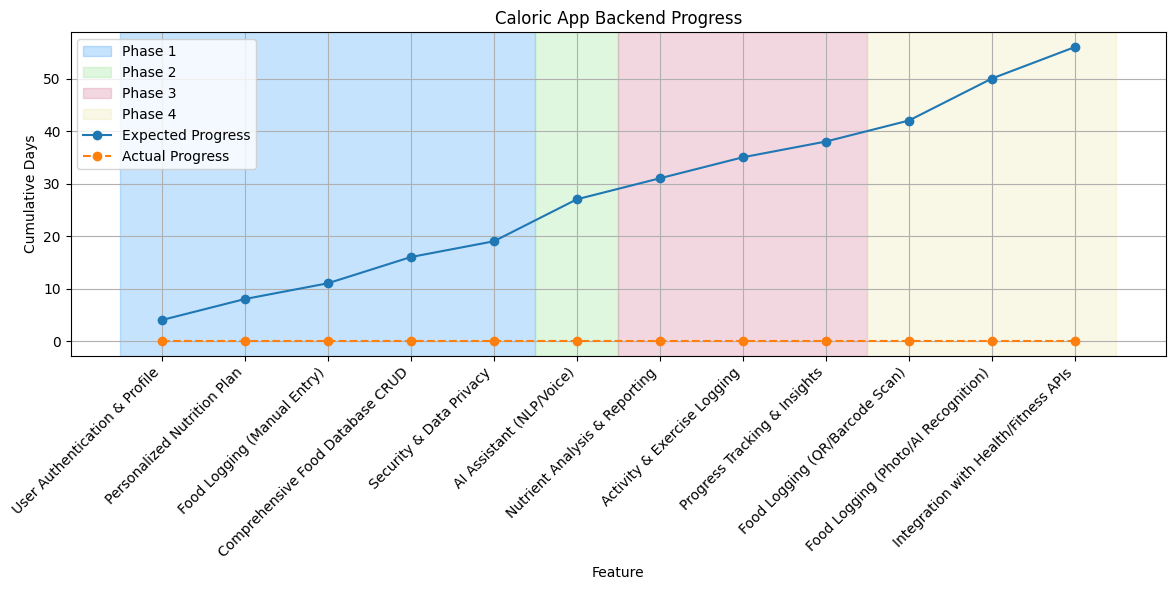

In [ ]:
# Calculate progress
df["Expected Cumulative Days"] = df["Planned Days"].cumsum()
df["Actual Days"] = df.apply(
    lambda row: row["Planned Days"] + row["Extra Days Taken"] if row["is_completed"] else 0,
    axis=1
)
df["Actual Cumulative Days"] = df["Actual Days"].cumsum()

# Plot
plt.figure(figsize=(12, 6))

# Add shaded areas for each phase
phases = df["Phase"].unique()
colors = ["#41a3f9", "#96e496", "#d97b9b", "#ede7ab"]  # Light background colors for each phase

start_idx = 0
for i, phase in enumerate(phases):
    phase_df = df[df["Phase"] == phase]
    end_idx = start_idx + len(phase_df)
    plt.axvspan(start_idx - 0.5, end_idx - 0.5, color=colors[i % len(colors)], alpha=0.3, label=f"Phase {phase}")
    start_idx = end_idx

# Plot lines
plt.plot(df["Feature"], df["Expected Cumulative Days"], label="Expected Progress", marker='o')
plt.plot(df["Feature"], df["Actual Cumulative Days"], label="Actual Progress", marker='o', linestyle='--')

# Highlight completed
for i, completed in enumerate(df["is_completed"]):
    if completed:
        plt.scatter(i, df.loc[i, "Actual Cumulative Days"], color="green", s=100, edgecolors='black', zorder=5)

# Styling
plt.title("Caloric App Backend Progress")
plt.xlabel("Feature")
plt.ylabel("Cumulative Days")
plt.xticks(rotation=45, ha='right')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


## Hours Tracking
- User Authentication - 4 hours
- User Profile - 2 hour
- Food Logging (Text based) - 3 hour
- Persistent Storage (SQL + Mongo) - 2 hours
- Ai Assistant - 4hours
- Security & Data Privacy

## TODO
- Complete MongoDB integration with food logging
- Complete MongoDB integration with ai transcript logging
- Integrate food logs and ai transcripts for ai conversations
